In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json


ModuleNotFoundError: No module named 'keras'

In [67]:


def add_hours_dam(df, start_hour, interval=48):
    for i in range(start_hour, start_hour+interval):
        start = str(i)
        df["DAM LMP_PRC_"+start+"_hours_ago"] = 0.0
    for i in range(len(df)-1, interval-1, -1):
        for j in range(start_hour, start_hour+interval):
            start = str(j)
            v = df['DAM LMP_PRC'].iloc[i-j,] 
            df.at[i, "DAM LMP_PRC_"+start+"_hours_ago"] =  v
    return df


def add_hours_rtm(df, start_hour, interval=48):
    for rtm in range(1, 13):
        for i in range(start_hour, start_hour+interval):
            start = str(i)
            df["RTM_"+str(rtm) +"_LMP_PRC_"+start+"_hours_ago"] = 0.0
        for i in range(len(df)-1, interval-1, -1):
            for j in range(start_hour, start_hour+interval):
                start = str(j)
                v = df[('RTM LMP_PRC', rtm)].iloc[i-j,] 
                df.at[i, "RTM_"+str(rtm) +"_LMP_PRC_"+start+"_hours_ago"] =  v
    return df

def add_hours_gap(df, start_hour, interval=48):
    for i in range(start_hour, start_hour+interval):
        start = str(i)
        df["GAP LMP_PRC_"+start+"_hours_ago"] = 0.0
    for i in range(len(df)-1, interval-1, -1):
        for j in range(start_hour, start_hour+interval):
            start = str(j)
            v = df['Gap'].iloc[i-j,] 
            df.at[i, "GAP LMP_PRC_"+start+"_hours_ago"] =  v
    return df

In [68]:
from sklearn.metrics import mean_absolute_error

def MAE(true, predicted):
    return mean_absolute_error(true, predicted)

def r_MAE(true, predicted):
    return mean_absolute_error(true, predicted)/np.mean(true)

def MSE(true, predicted):
    squared_diff = np.square(true - predicted)
    return np.mean(squared_diff)

# Root Mean Square Error
def RMSE(true, predicted):
    squared_diff = np.square(true - predicted)    
    return np.sqrt(np.mean(squared_diff))

# R-squared, coefficient of determination
def R_squared(true, predicted):
    true      = np.array(true)
    predicted = np.array(predicted)
    sum_squared_diff = sum(np.square(true - predicted))
    variance  = sum(np.square(true - np.mean(true)))
    calc_r2   = 1 - (sum_squared_diff / variance)
    return calc_r2

def r_MSE(true, predicted):
    mse = MSE(true, predicted)
    return mse/np.mean(true)

def r_RMSE(true, predicted):
    rmse = RMSE(true, predicted)
    return rmse/np.mean(true)


def MAPE(true, predicted): 
    return np.mean(np.abs((true - predicted) / true)) * 100

In [69]:
def Evaluate(Y_true, predictions):
    print('MAE '+str(MAE(Y_true, predictions)))
    print('RMSE '+str(RMSE(Y_true, predictions)))
    print('rMAE '+str(r_MAE(Y_true, predictions)*100) +'%')
    print('rRMSE '+str(r_RMSE(Y_true, predictions)*100)+'%')
    print('MAPE '+str(MAPE(Y_true, predictions))+'%')

In [139]:
df = pd.read_pickle('df.pkl')
df = df.reset_index(drop=True)
df = add_hours_rtm(df, 12, 1)
df = add_hours_dam(df, 1, 1)
Y_cols = ['DAM LMP_PRC'] 
X_cols = [col for col in list(df) if col not in Y_cols+[
('HASP LMP_CONG_PRC', 1),
('HASP LMP_CONG_PRC', 2),
('HASP LMP_CONG_PRC', 3),
('HASP LMP_CONG_PRC', 4),
('HASP LMP_ENE_PRC', 1),
('HASP LMP_ENE_PRC', 2),
('HASP LMP_ENE_PRC', 3),
('HASP LMP_ENE_PRC', 4),
('HASP LMP_GHG_PRC', 1),
('HASP LMP_LOSS_PRC', 1),
('HASP LMP_LOSS_PRC', 2),
('HASP LMP_LOSS_PRC', 3),
('HASP LMP_LOSS_PRC', 4),
('HASP LMP_PRC', 1),
('HASP LMP_PRC', 2),
('HASP LMP_PRC', 3),
('HASP LMP_PRC', 4),
('RTM LMP_CONG_PRC', 1),
('RTM LMP_CONG_PRC', 2),
('RTM LMP_CONG_PRC', 3),
('RTM LMP_CONG_PRC', 4),
('RTM LMP_CONG_PRC', 5),
('RTM LMP_CONG_PRC', 6),
('RTM LMP_CONG_PRC', 7),
('RTM LMP_CONG_PRC', 8),
('RTM LMP_CONG_PRC', 9),
('RTM LMP_CONG_PRC', 10),
('RTM LMP_CONG_PRC', 11),
('RTM LMP_CONG_PRC', 12),
('RTM LMP_ENE_PRC', 1),
('RTM LMP_ENE_PRC', 2),
('RTM LMP_ENE_PRC', 3),
('RTM LMP_ENE_PRC', 4),
('RTM LMP_ENE_PRC', 5),
('RTM LMP_ENE_PRC', 6),
('RTM LMP_ENE_PRC', 7),
('RTM LMP_ENE_PRC', 8),
('RTM LMP_ENE_PRC', 9),
('RTM LMP_ENE_PRC', 10),
('RTM LMP_ENE_PRC', 11),
('RTM LMP_ENE_PRC', 12),
('RTM LMP_GHG_PRC', 1),
('RTM LMP_GHG_PRC', 7),
('RTM LMP_LOSS_PRC', 1),
('RTM LMP_LOSS_PRC', 2),
('RTM LMP_LOSS_PRC', 3),
('RTM LMP_LOSS_PRC', 4),
('RTM LMP_LOSS_PRC', 5),
('RTM LMP_LOSS_PRC', 6),
('RTM LMP_LOSS_PRC', 7),
('RTM LMP_LOSS_PRC', 8),
('RTM LMP_LOSS_PRC', 9),
('RTM LMP_LOSS_PRC', 10),
('RTM LMP_LOSS_PRC', 11),
('RTM LMP_LOSS_PRC', 12),
('RTM LMP_PRC', 1),
('RTM LMP_PRC', 2),
('RTM LMP_PRC', 3),
('RTM LMP_PRC', 4),
('RTM LMP_PRC', 5),
('RTM LMP_PRC', 6),
('RTM LMP_PRC', 7),
('RTM LMP_PRC', 8),
('RTM LMP_PRC', 9),
('RTM LMP_PRC', 10),
('RTM LMP_PRC', 11),
('RTM LMP_PRC', 12),
'DAM LMP_CONG_PRC',
'DAM LMP_GHG_PRC',
('HASP LMP_CONG_PRC', 1),
('HASP LMP_CONG_PRC', 2),
('HASP LMP_CONG_PRC', 3),
('HASP LMP_CONG_PRC', 4),
('HASP LMP_ENE_PRC', 1),
('HASP LMP_ENE_PRC', 2),
('HASP LMP_ENE_PRC', 3),
('HASP LMP_ENE_PRC', 4),
('HASP LMP_GHG_PRC', 1),
('HASP LMP_LOSS_PRC', 1),
('HASP LMP_LOSS_PRC', 2),
('HASP LMP_LOSS_PRC', 3),
('HASP LMP_LOSS_PRC', 4),
('HASP LMP_PRC', 1),
('HASP LMP_PRC', 2),
('HASP LMP_PRC', 3),
('HASP LMP_PRC', 4),
('RTM LMP_CONG_PRC', 1),
('RTM LMP_CONG_PRC', 2),
('RTM LMP_CONG_PRC', 3),
('RTM LMP_CONG_PRC', 4),
('RTM LMP_CONG_PRC', 5),
('RTM LMP_CONG_PRC', 6),
('RTM LMP_CONG_PRC', 7),
('RTM LMP_CONG_PRC', 8),
('RTM LMP_CONG_PRC', 9),
('RTM LMP_CONG_PRC', 10),
('RTM LMP_CONG_PRC', 11),
('RTM LMP_CONG_PRC', 12),
('RTM LMP_GHG_PRC', 1),
('RTM LMP_GHG_PRC', 7),
'DAM LMP_ENE_PRC',
'DAM LMP_LOSS_PRC',
'Actual_Demand',
('RTM LMP_PRC', 1),
'DAM LMP_PRC',]]
          
Y = df[Y_cols]
X = df[X_cols]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False, random_state=42)
ss1 = MinMaxScaler(feature_range=(0, 1))
X_train = ss1.fit_transform(X_train)
X_test = ss1.transform(X_test)
ss2 = MinMaxScaler(feature_range=(0, 1))
Y_train = ss2.fit_transform(Y_train)
Y_test = ss2.transform(Y_test)

In [192]:
lookback_length = 24*7
batch_size = 1

In [193]:
from keras.preprocessing.sequence import TimeseriesGenerator
train_sequences  = TimeseriesGenerator(X_train,
                                       Y_train,
                                       length=lookback_length,
                                       batch_size=batch_size)
test_sequences = TimeseriesGenerator(X_test,
                                     Y_test,
                                     length=lookback_length,
                                     batch_size=batch_size)

In [194]:
features = len(list(X))

In [196]:
model = Sequential()

model.add(LSTM(units=100, input_shape=(lookback_length, features)))
# model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='rmsprop',loss='mean_squared_error')
model.fit_generator(train_sequences, validation_data=test_sequences, epochs=10, verbose=1)

Epoch 1/10
14741/14741 [==============================] - 1028s 70ms/step - loss: 7.3873e-04 - val_loss: 3.7475e-06
Epoch 2/10
14741/14741 [==============================] - 1052s 71ms/step - loss: 2.5014e-04 - val_loss: 1.4289e-05
Epoch 3/10
14741/14741 [==============================] - 1089s 74ms/step - loss: 2.3040e-04 - val_loss: 3.4939e-06
Epoch 4/10
 8926/14741 [=================>............] - ETA: 6:41 - loss: 2.1818e-0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



14741/14741 [==============================] - 1060s 72ms/step - loss: 2.1968e-04 - val_loss: 7.3573e-06
Epoch 6/10
14741/14741 [==============================] - 1073s 73ms/step - loss: 2.1179e-04 - val_loss: 2.1233e-05
Epoch 7/10
14741/14741 [==============================] - 881s 60ms/step - loss: 2.0152e-04 - val_loss: 8.5495e-05
Epoch 8/10
14741/14741 [==============================] - 872s 59ms/step - loss: 2.0743e-04 - val_loss: 1.4163e-06
Epoch 9/10
14741/14741 [==============================] - 855s 58ms/step - loss: 2.0995e-04 - val_loss: 5.0260e-05
Epoch 10/10
14741/14741 [==============================] - 831s 56ms/step - loss: 2.1763e-04 - val_loss: 2.2125e-05


In [197]:
scaled_predictions = model.predict_generator(test_sequences)

In [198]:
predictions = ss2.inverse_transform(np.array(scaled_predictions).reshape(1, -1))

In [199]:
temp = ss2.inverse_transform(Y_test)

In [200]:
Y_true = []
temp = ss2.inverse_transform(Y_test)
for item in temp:
    Y_true.append(item[0])

In [201]:
Evaluate(Y_true[:-lookback_length], predictions[0])

MAE 20.663387544341436
RMSE 26.967736311255575


In [1]:
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates



plt.figure(figsize=(15,8))
day = 21
plt.plot(Y_true[day*24+1:day*24+48],
         label='test Y-true',
         color='blue')
plt.plot(predictions[0][day*24+1:day*24+48],
         label='LSTM',
         color='green',linestyle='dashed')

# plt.plot(lasso_gap,
#          label='Lasso',
#          color='red',linestyle=':')
plt.legend()
plt.xlim(0,48)
plt.title('DAM Predicitons vs Actual Values', fontsize=18)
plt.xlabel('Hour')
plt.ylabel('Price')
# plt.savefig('../images/dam_RNN_12_test_pred_vs_true_zoomed.jpg', bbox_inches='tight')
plt.show();

NameError: name 'plt' is not defined

In [136]:
from pandas import Series
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
df = pd.read_pickle('df.pkl')
df = df.reset_index(drop=True)
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [495]:

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

In [510]:
supervised_values.shape

(16565, 2)

In [524]:
import numpy as np # linear algebra
from numpy import newaxis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [526]:
Enrol_window = 100

print ('enrol window set to',Enrol_window )

enrol window set to 100


In [6]:

def load_data(datasetname, column, seq_len, normalise_window):
    # A support function to help prepare datasets for an RNN/LSTM/GRU
 # A support function to help prepare datasets for an RNN/LSTM/GRU
    data = datasetname.loc[:,column]

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
#     if normalise_window:
#         result = sc.fit_transform(result)
#         result = normalise_windows(result)

    result = np.array(result)

    #Last 10% is used for validation test, first 90% for training
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    # A support function to normalize a dataset
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of <prediction_len> steps before shifting prediction run forward by <prediction_len> steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

def plot_results(predicted_data, true_data): 
    fig = plt.figure(facecolor='white') 
    ax = fig.add_subplot(111) 
    ax.plot(true_data, label='True Data') 
    plt.plot(predicted_data, label='Prediction') 
    plt.legend() 
    plt.show() 
    
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

print ('Support functions defined')

Support functions defined


In [7]:

df = pd.read_pickle('df.pkl')
df = df.reset_index(drop=True)
df = df.drop([('HASP LMP_CONG_PRC', 1),
('HASP LMP_CONG_PRC', 2),
('HASP LMP_CONG_PRC', 3),
('HASP LMP_CONG_PRC', 4),
('HASP LMP_ENE_PRC', 1),
('HASP LMP_ENE_PRC', 2),
('HASP LMP_ENE_PRC', 3),
('HASP LMP_ENE_PRC', 4),
('HASP LMP_GHG_PRC', 1),
('HASP LMP_LOSS_PRC', 1),
('HASP LMP_LOSS_PRC', 2),
('HASP LMP_LOSS_PRC', 3),
('HASP LMP_LOSS_PRC', 4),
('HASP LMP_PRC', 1),
('HASP LMP_PRC', 2),
('HASP LMP_PRC', 3),
('HASP LMP_PRC', 4),
('RTM LMP_CONG_PRC', 1),
('RTM LMP_CONG_PRC', 2),
('RTM LMP_CONG_PRC', 3),
('RTM LMP_CONG_PRC', 4),
('RTM LMP_CONG_PRC', 5),
('RTM LMP_CONG_PRC', 6),
('RTM LMP_CONG_PRC', 7),
('RTM LMP_CONG_PRC', 8),
('RTM LMP_CONG_PRC', 9),
('RTM LMP_CONG_PRC', 10),
('RTM LMP_CONG_PRC', 11),
('RTM LMP_CONG_PRC', 12),
('RTM LMP_ENE_PRC', 1),
('RTM LMP_ENE_PRC', 2),
('RTM LMP_ENE_PRC', 3),
('RTM LMP_ENE_PRC', 4),
('RTM LMP_ENE_PRC', 5),
('RTM LMP_ENE_PRC', 6),
('RTM LMP_ENE_PRC', 7),
('RTM LMP_ENE_PRC', 8),
('RTM LMP_ENE_PRC', 9),
('RTM LMP_ENE_PRC', 10),
('RTM LMP_ENE_PRC', 11),
('RTM LMP_ENE_PRC', 12),
('RTM LMP_GHG_PRC', 1),
('RTM LMP_GHG_PRC', 7),
('RTM LMP_LOSS_PRC', 1),
('RTM LMP_LOSS_PRC', 2),
('RTM LMP_LOSS_PRC', 3),
('RTM LMP_LOSS_PRC', 4),
('RTM LMP_LOSS_PRC', 5),
('RTM LMP_LOSS_PRC', 6),
('RTM LMP_LOSS_PRC', 7),
('RTM LMP_LOSS_PRC', 8),
('RTM LMP_LOSS_PRC', 9),
('RTM LMP_LOSS_PRC', 10),
('RTM LMP_LOSS_PRC', 11),
('RTM LMP_LOSS_PRC', 12),
('RTM LMP_PRC', 2),
('RTM LMP_PRC', 3),
('RTM LMP_PRC', 4),
('RTM LMP_PRC', 5),
('RTM LMP_PRC', 6),
('RTM LMP_PRC', 7),
('RTM LMP_PRC', 8),
('RTM LMP_PRC', 9),
('RTM LMP_PRC', 10),
('RTM LMP_PRC', 11),
('RTM LMP_PRC', 12),
'DAM LMP_CONG_PRC',
'DAM LMP_GHG_PRC',
('HASP LMP_CONG_PRC', 1),
('HASP LMP_CONG_PRC', 2),
('HASP LMP_CONG_PRC', 3),
('HASP LMP_CONG_PRC', 4),
('HASP LMP_ENE_PRC', 1),
('HASP LMP_ENE_PRC', 2),
('HASP LMP_ENE_PRC', 3),
('HASP LMP_ENE_PRC', 4),
('HASP LMP_GHG_PRC', 1),
('HASP LMP_LOSS_PRC', 1),
('HASP LMP_LOSS_PRC', 2),
('HASP LMP_LOSS_PRC', 3),
('HASP LMP_LOSS_PRC', 4),
('HASP LMP_PRC', 1),
('HASP LMP_PRC', 2),
('HASP LMP_PRC', 3),
('HASP LMP_PRC', 4),
('RTM LMP_CONG_PRC', 1),
('RTM LMP_CONG_PRC', 2),
('RTM LMP_CONG_PRC', 3),
('RTM LMP_CONG_PRC', 4),
('RTM LMP_CONG_PRC', 5),
('RTM LMP_CONG_PRC', 6),
('RTM LMP_CONG_PRC', 7),
('RTM LMP_CONG_PRC', 8),
('RTM LMP_CONG_PRC', 9),
('RTM LMP_CONG_PRC', 10),
('RTM LMP_CONG_PRC', 11),
('RTM LMP_CONG_PRC', 12),
('RTM LMP_GHG_PRC', 1),
('RTM LMP_GHG_PRC', 7),
'DAM LMP_ENE_PRC',
'DAM LMP_LOSS_PRC',
'Actual_Demand'], axis=1)
df = df.drop([('RTM LMP_PRC', 1)], axis=1)

In [8]:
list(df)

['hr_index',
 ('RT_Forecast_RTD', 1),
 ('RT_Forecast_RTD', 2),
 ('RT_Forecast_RTD', 3),
 ('RT_Forecast_RTD', 4),
 ('RT_Forecast_RTD', 5),
 ('RT_Forecast_RTD', 6),
 ('RT_Forecast_RTD', 7),
 ('RT_Forecast_RTD', 8),
 ('RT_Forecast_RTD', 9),
 ('RT_Forecast_RTD', 10),
 ('RT_Forecast_RTD', 11),
 ('RT_Forecast_RTD', 12),
 ('DAM RT_Forecast_RTPD', 1),
 ('DAM RT_Forecast_RTPD', 2),
 ('DAM RT_Forecast_RTPD', 3),
 ('DAM RT_Forecast_RTPD', 4),
 'Demand_Forecast_7Day_Ahead',
 'Demand_Forecast_2Day_Ahead',
 'Demand_Forecast_Day_Ahead',
 'altimeter_set_1',
 'Temperature',
 'dewpoint',
 'humidity',
 'relative_humidity_set_1',
 'windspeed',
 'Wind Direction',
 'wind_gust_set_1',
 'weather_cond_code_set_1',
 'cloud_layer_3_code_set_1',
 'precip_accum_one_hour_set_1',
 'cloud_layer_1_code_set_1',
 'cloud_layer_2_code_set_1',
 'visibility_set_1',
 'ceiling_set_1',
 'wind_chill_set_1d',
 'pressure',
 'sea_level_pressure_set_1d',
 'heat_index_set_1d',
 'weather_condition_set_1d',
 'precipitation',
 'precipi

In [9]:
feature_train, label_train, feature_test, label_test = load_data(df, 'DAM LMP_PRC', 24, True)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(feature_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

model compiled


In [11]:
model.fit(feature_train, label_train, batch_size=512, epochs=100, validation_data = (feature_test, label_test))

Train on 14887 samples, validate on 1654 samples
Epoch 1/100
14887/14887 [==============================] - 5s 352us/step - loss: 3414.7824 - val_loss: 2340.0999
Epoch 2/100
14887/14887 [==============================] - 4s 265us/step - loss: 2860.6190 - val_loss: 1888.0196
Epoch 3/100
14887/14887 [==============================] - 4s 258us/step - loss: 2687.1645 - val_loss: 1668.0226
Epoch 4/100
14887/14887 [==============================] - 4s 263us/step - loss: 2586.3298 - val_loss: 1496.1490
Epoch 5/100
14887/14887 [==============================] - 4s 261us/step - loss: 2509.6798 - val_loss: 1356.4570
Epoch 6/100
14887/14887 [==============================] - 4s 269us/step - loss: 2451.1213 - val_loss: 1246.1810
Epoch 7/100
14887/14887 [==============================] - 4s 258us/step - loss: 2375.4321 - val_loss: 1139.8488
Epoch 8/100
14887/14887 [==============================] - 4s 258us/step - loss: 2293.7631 - val_loss: 1034.8911
Epoch 9/100
14887/14887 [======================

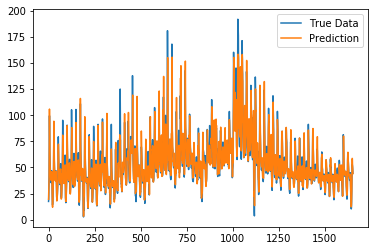

In [31]:
dam_lstm = model.predict(feature_test)
plot_results(predicted_stock_price,label_test)

In [64]:
Evaluate(label_test,dam_lstm)

MAE 5.156900474689165
RMSE 33.573485299012596


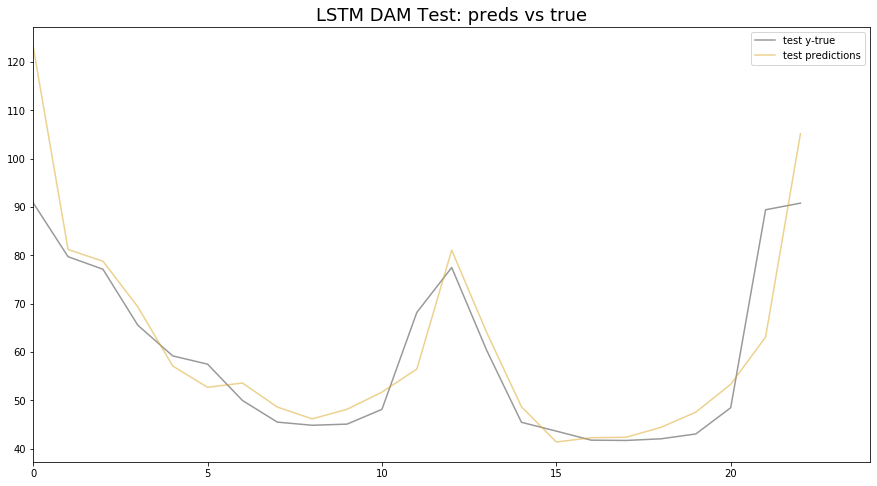

In [65]:

plt.figure(figsize=(15,8))
day = 25
plt.plot(label_test[day*24+1:day*24+24],
         label='test y-true',
         alpha = 0.8,
         color='grey')
plt.plot(dam_lstm[day*24+1:day*24+24],
         label='test predictions',
         alpha = 0.5,
         color='goldenrod')
plt.legend()
plt.xlim(0, 24)
plt.title('LSTM DAM Test: preds vs true', fontsize=18)
# plt.savefig('../images/dam_RNN_12_test_pred_vs_true_zoomed.jpg', bbox_inches='tight')
plt.show();

In [666]:
Evaluate(label_test, predicted_stock_price)

MAE 5.562831420021426
RMSE 32.783820963822635


In [667]:
Evaluate_Scaled(label_test, predicted_stock_price)

rMAE 10.316861726477427%
rRMSE 60.80107812219973%
MAPE 57.1781482664834%


In [ ]:
def load_data(datasetname, column, seq_len, normalise_window):
    # A support function to help prepare datasets for an RNN/LSTM/GRU
 # A support function to help prepare datasets for an RNN/LSTM/GRU
    data = datasetname.loc[:,column]

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
#     if normalise_window:
#         result = sc.fit_transform(result)
#         result = normalise_windows(result)

    result = np.array(result)

    #Last 10% is used for validation test, first 90% for training
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

In [ ]:
data[index: index + sequence_length]